In [5]:
import shutil
import os
from sklearn.model_selection import train_test_split
from os import listdir


In [6]:
# import os
folder_path =r"C:\lux academy datacamp\Machine Learning\detection_model\train1" 
foldernames = os.listdir(folder_path)
foldernames[:10]

['Bear',
 'Brown bear',
 'Bull',
 'Butterfly',
 'Camel',
 'Canary',
 'Caterpillar',
 'Cattle',
 'Centipede',
 'Cheetah']

In [7]:
subfolder_names = foldernames[:10]
subfolder_names

['Bear',
 'Brown bear',
 'Bull',
 'Butterfly',
 'Camel',
 'Canary',
 'Caterpillar',
 'Cattle',
 'Centipede',
 'Cheetah']

In [4]:

import shutil

src_folder = folder_path
dest_folder = r"C:\lux academy datacamp\Machine Learning\detection_model\train3"

for subfolder in subfolder_names:
    dest_dir = os.path.join(dest_folder, subfolder)
    if not os.path.exists(dest_dir):
         os.makedirs(dest_dir)
        

    count = 1
    
    source_dir =os.path.join(src_folder, subfolder)
    for filename in os.listdir(source_dir):
         if filename.endswith('.jpg'):
              new_filename = subfolder + str(count) + '.jpg'
              src_file = os.path.join(source_dir, filename)
              dest_file = os.path.join(dest_dir,new_filename)
              shutil.copyfile(src_file, dest_file)
              count+=1


In [14]:

src_directory = r"C:\lux academy datacamp\Machine Learning\detection_model\train3"
train_directory = r"C:\lux academy datacamp\Machine Learning\detection_model\train4"
validation_directory = r"C:\lux academy datacamp\Machine Learning\detection_model\val2"

for class_name in os.listdir(src_directory):
    class_dir = os.path.join(src_directory, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = os.listdir(class_dir)
    train_images, validation_images = train_test_split(images, test_size=0.2)

    for image in train_images:
        source = os.path.join(class_dir, image)
        destination = os.path.join(train_directory, class_name, image)
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        shutil.copyfile(source, destination)

    
    for image in validation_images:
        source = os.path.join(class_dir, image)
        destination = os.path.join(validation_directory, class_name, image)
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        shutil.copyfile(source, destination)

    



DATA PREPROCESSING

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = r"C:\lux academy datacamp\Machine Learning\detection_model\train4"
test_data_dir = r"C:\lux academy datacamp\Machine Learning\detection_model\val2"

#Training generator instance of ImageDataGenerator to be used during training
#data augmentation performed
training_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
#instance for test data, no augmentation just normalization of images
test_datagen = ImageDataGenerator( rescale=1./255)

#specifying batch size, epochs, target size and validation steps
batch_size =10
target_size =(150,150)

#Train generator
train_generator = training_datagen.flow_from_directory(
                    train_data_dir,
                    target_size=target_size,
                    batch_size=batch_size,
                    class_mode='categorical'
                )

#validation generator
validation_generator = test_datagen.flow_from_directory(
                    test_data_dir,
                    class_mode='categorical',
                    batch_size=batch_size,
                    target_size=target_size
                )

Found 2546 images belonging to 10 classes.
Found 641 images belonging to 10 classes.


MODEL BUILDING

In [42]:
from keras import layers, models

model= models.Sequential([
    #feature extraction
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(512,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    
    #classification
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1,activation='sigmoid',)
   
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 128)     

COMPILING THE MODEL

In [43]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

FITTING THE MODEL

In [45]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=30
)

Epoch 1/5
100/100 [==============================] - 67s 670ms/step - loss: 0.3267 - accuracy: 0.9000 - val_loss: 0.3259 - val_accuracy: 0.9000
Epoch 2/5
100/100 [==============================] - 64s 641ms/step - loss: 0.3261 - accuracy: 0.9000 - val_loss: 0.3272 - val_accuracy: 0.9000
Epoch 3/5
100/100 [==============================] - 59s 583ms/step - loss: 0.3259 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 4/5
100/100 [==============================] - 64s 642ms/step - loss: 0.3257 - accuracy: 0.9000 - val_loss: 0.3252 - val_accuracy: 0.9000
Epoch 5/5
100/100 [==============================] - 68s 676ms/step - loss: 0.3256 - accuracy: 0.9000 - val_loss: 0.3256 - val_accuracy: 0.9000


SAVING THE MODEL

In [46]:
model.save('animal_detection_model1.h5')

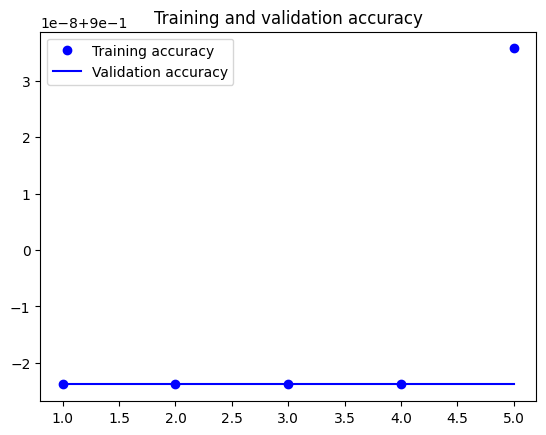

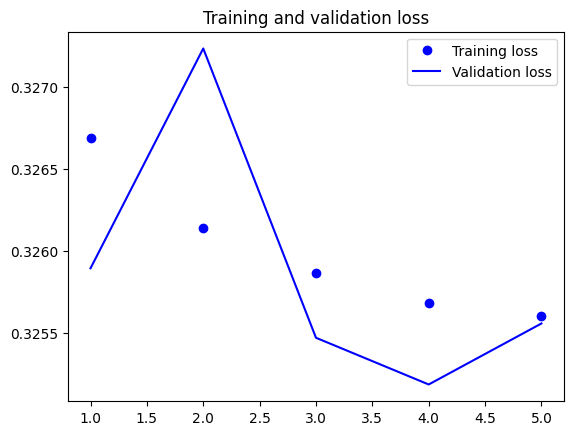

In [47]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Plotting sample image

Found 3187 images belonging to 10 classes.


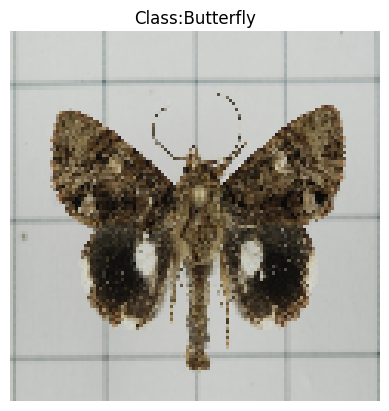

In [48]:
import numpy as np
import os
#loading the data
data_dir = r"C:\lux academy datacamp\Machine Learning\detection_model\train3"
classnames = os.listdir(data_dir)
number_of_classes = len(classnames)

image_size = (120, 120)
batch_size = 32

data_generator = ImageDataGenerator(rescale=1./255)
data = data_generator.flow_from_directory(
    data_dir,
    target_size= image_size,
    batch_size = batch_size,
    class_mode = "categorical"
)

X_batch, y_batch = data.next()

#choosing random image from the data
index = np.random.randint(batch_size)
img = X_batch[index]
class_index = np.argmax(y_batch[index])
class_name = classnames[class_index]

#plotting the image and label sample
plt.imshow(img)
plt.title(f"Class:{class_name}")
plt.axis("off")
plt.show()


Predicting images using the saved model

In [1]:
import tensorflow as tf
import cv2
import numpy as np

#loading the model
model = tf.keras.models.load_model(r"C:\lux academy datacamp\Machine Learning\detection_model\animal_detection_model1.h5")

#loading image to predict
img = cv2.imread(r"C:\lux academy datacamp\Machine Learning\detection_model\val2\Cheetah\Cheetah2.jpg")
img = cv2.resize(img, (150,150))
img = np.expand_dims(img, axis=0)

#make the prediction
predictions = model.predict(img)
class_idx = np.argmax(predictions)
name_of_the_class = classnames[class_idx]

# plt.imshow(img)
# # plt.title(f"Class:{class_name}")
# plt.axis("off")
# plt.show()
#print the predicted class name
print("predicted class:", name_of_the_class)

1/1 [==============================] - 0s 393ms/step


NameError: name 'classnames' is not defined